Имеется датасет: база данных масштабного опроса об отношении к иммигрантам, проведенного в 6 странах (Германия, Франция, Италия, Швеция, Великобритания и США), в общей сложности включающего 22,500 респондентов.

Единицей наблюдения является индивид. Собиралась информация о социальнодемографическом статусе участников (пол, возраст, занятость, образование…) и их взглядах на иммиграцию. Участникам также задали ряд вопросов, которые касались их представлений о фактах, связанных с эмиграцией, таких как их численность, регион происхождения, религия и уровень образования. Пример вопроса:

1 - Из каждых 100 человек, родившихся в США, сколько в настоящее время безработных? (Безработными мы называем людей, которые в настоящее время не работают, но ищут работу (и, возможно, не могут ее найти))

2 - А теперь сравним это с количеством безработных среди легальных иммигрантов. Из каждых 100 легальных иммигрантов, как вы думаете, сколько в настоящее время безработных?

Данные были дополнены официальными статистическими данными о численности, происхождении, религии, образовании и т. д. иммигрантов



Что нужно сделать.

На основе этих данных нужно построить графики, которые визуализируют ответы на вопросы:

Насколько сильно ответ на вопрос: "Вы считаете, что правительство должно заботиться
только о местных жителях или обо всех? " зависит от пола и занятости респондента?

Как отличаются в зависимости от возраста человека и страны взгляды на ставку налога, которую должен платить 1% самых богатых жителей страны?
Есть ли влияние политических взглядов на отношение к неравенству по доходам как к проблеме и наоборот?


In [10]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [11]:
df = pd.read_excel('db_hw.xlsx', sheet_name='датасет')

In [12]:
df.columns

Index(['sex', 'age', 'marital_status', 'number_children', 'q_parent_same',
       'employment', 'household_income', 'q_inequality_problem',
       'perc_share_foreign', 'perc_share_ch', 'perc_share_mu',
       'perc_unemp_nat', 'perc_unemp_imm', 'perc_higheduc_nat',
       'perc_higheduc_imm', 'perc_loweduc_nat', 'perc_loweduc_imm',
       'perc_poverty_nat', 'perc_poverty_imm', 'q_imm_problem',
       'q_imm_benefits', 'q_imm_citizenship', 'q_imm_american',
       'transfers_imm', 'tax_top1', 'tax_bottom50', 'country', 'q_govt_imm',
       'lfyyst', 'sector_dummy', 'party_voted', 'perc_share_NA',
       'perc_share_LA', 'perc_share_WE', 'perc_share_EE', 'perc_share_NAF',
       'perc_share_SA', 'perc_share_ME', 'perc_share_A', 'perc_share_O',
       'share_foreign_lc', 'share_Europe_lc', 'share_NorthAmerica_lc',
       'share_LatinAmerica_lc', 'share_Asia_lc', 'share_Africa_lc',
       'college_imm_lc', 'loweduc_imm_lc', 'college_nat_lc', 'loweduc_nat_lc',
       'unemp_imm_lc', 'unem

In [5]:
df1 = df[['sex', 'employment', 'q_govt_imm']]

<Axes: >

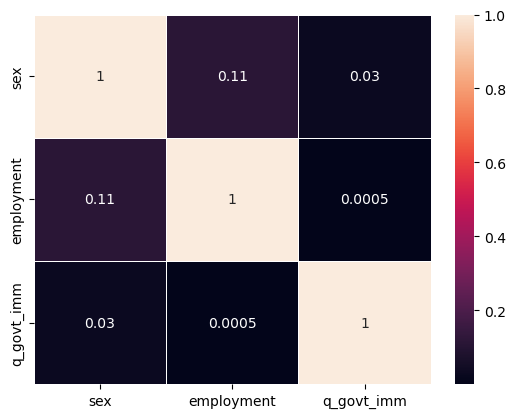

In [6]:
sns.heatmap(df1.corr(), annot=True, linewidths=0.5)

<Axes: xlabel='q_govt_imm'>

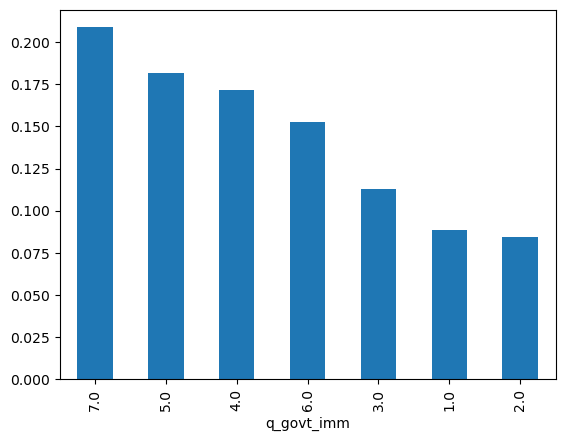

In [44]:
df.q_govt_imm.value_counts(normalize=True).plot(kind="bar")

In [31]:
df['sex_str'] = np.where(df1['sex']==1, "Male", "Female")

Насколько сильно ответ на вопрос: 
"Вы считаете, что правительство должно заботиться только о местных жителях или обо всех? " зависит от пола и занятости респондента?

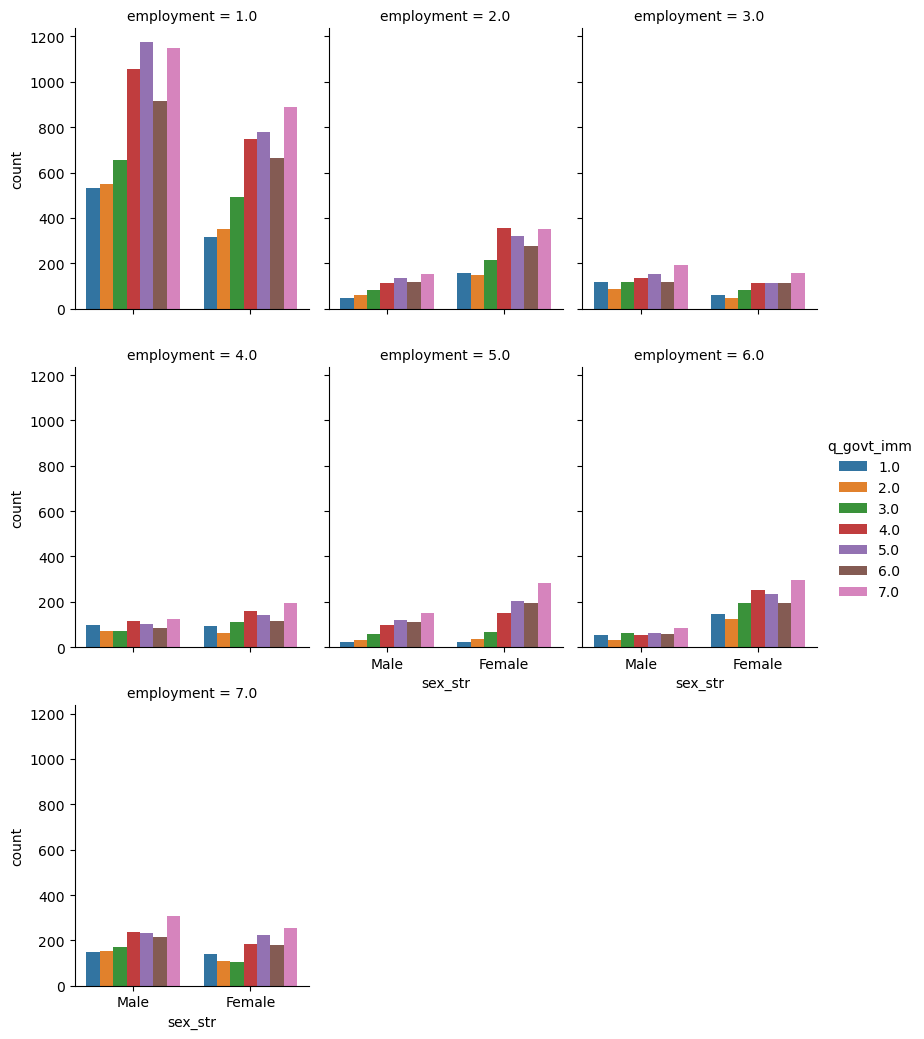

In [33]:
g = sns.catplot(
    data=df, x="sex_str", col="employment",  hue='q_govt_imm', 
    col_wrap=3,  kind="count", height=3.5, aspect=.8, ) # dodge=False

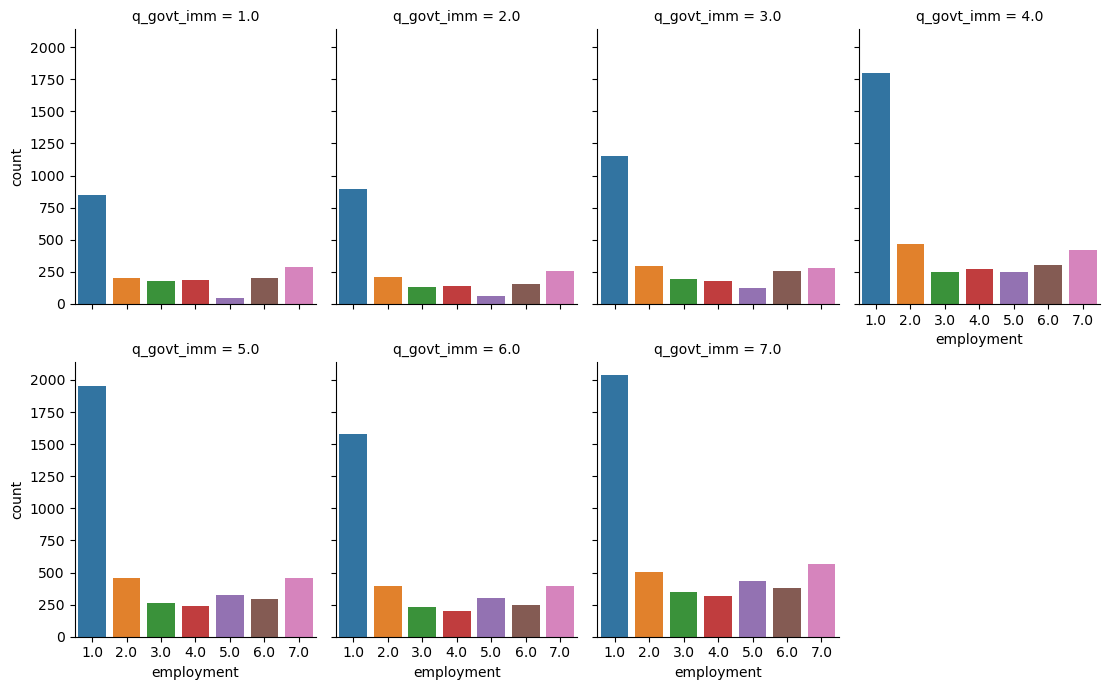

In [36]:
g = sns.catplot(data=df, x="employment", col="q_govt_imm", col_wrap=4,  kind="count", height=3.5, aspect=.8 , hue_norm=True)

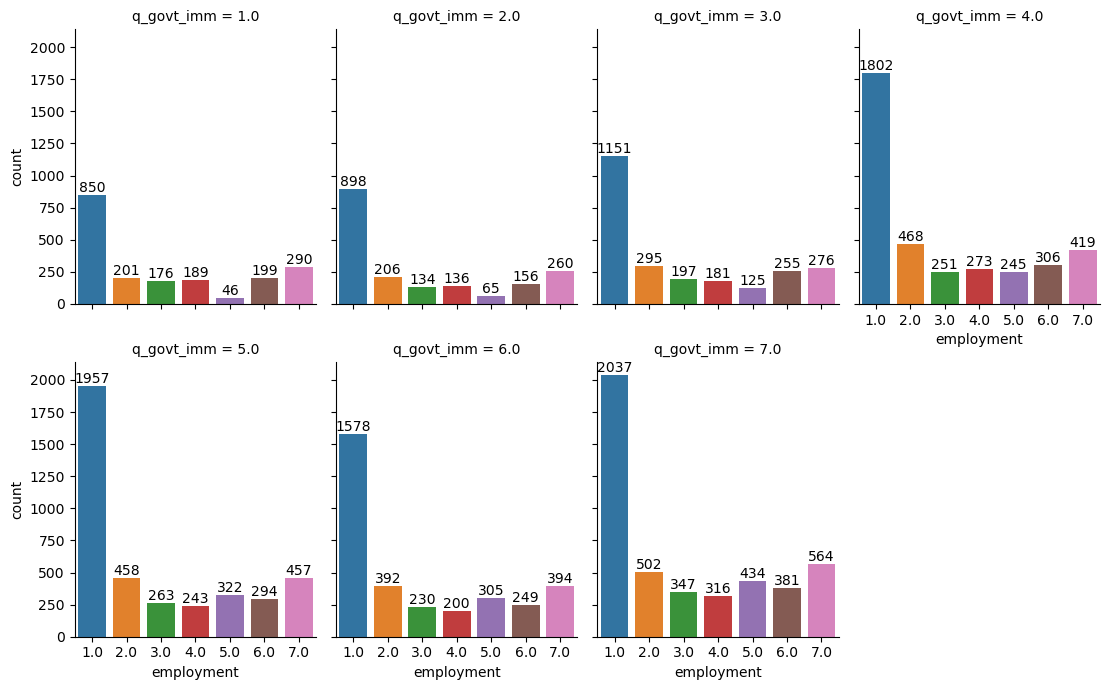

In [8]:
g = sns.catplot(data=df, x="employment", col="q_govt_imm", col_wrap=4,  kind="count", height=3.5, aspect=.8)
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0])

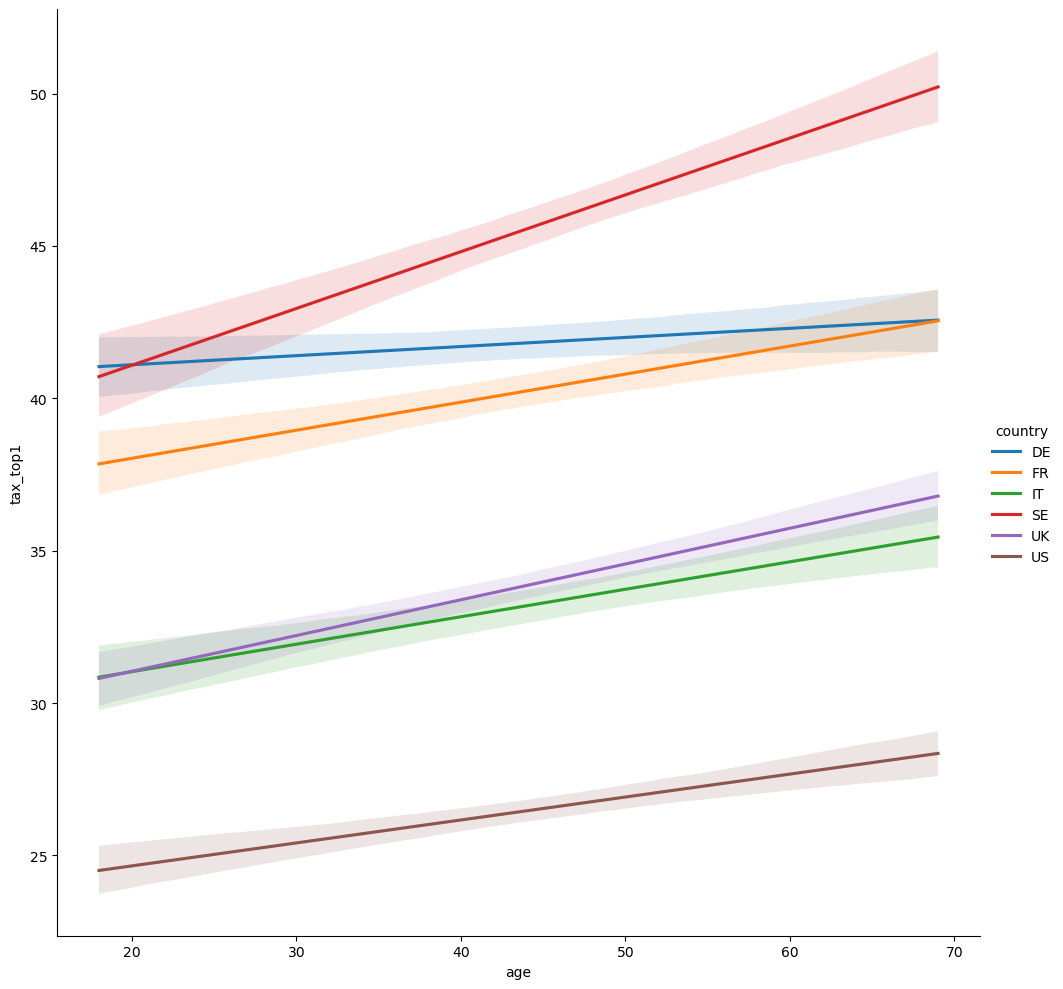

In [25]:
sns.lmplot(data=df, x="age", y="tax_top1", hue="country", height=10, scatter=False,)

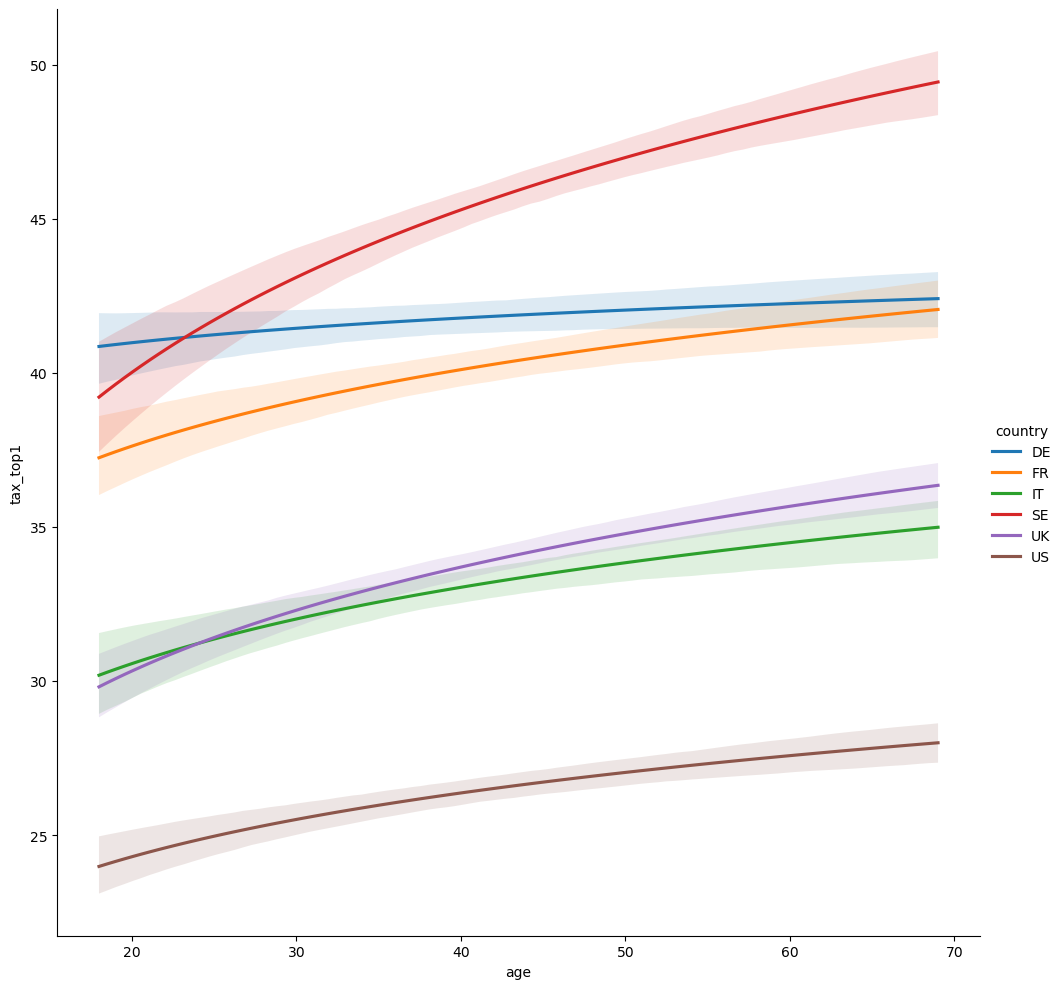

In [21]:
sns.lmplot(data=df, x="age", y="tax_top1", hue="country", height=10, scatter=False, logx=True)

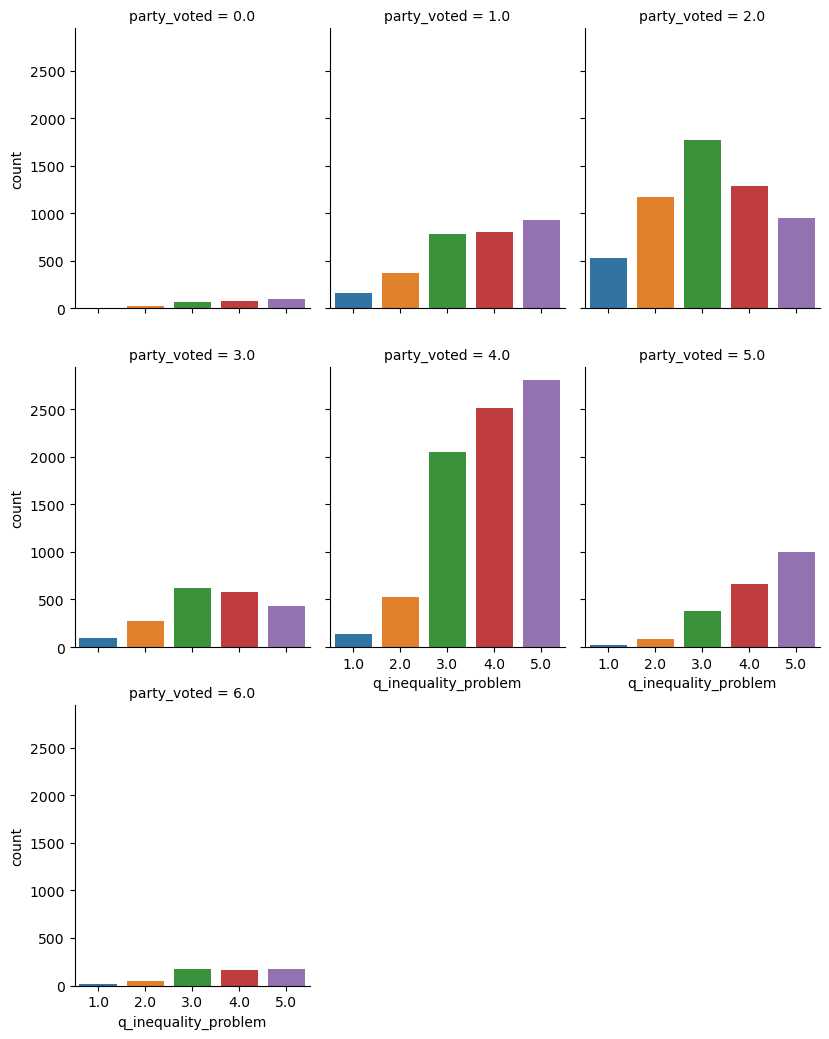

In [29]:
g = sns.catplot(
    data=df, x="q_inequality_problem", col="party_voted",
    col_wrap=3,  kind="count", height=3.5, aspect=.8, ) # dodge=False

In [ ]:
g = sns.catplot("alive", col="deck", col_wrap=3,
                data=titanic[titanic.deck.notnull()],
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')

In [ ]:
party_voted

In [ ]:
q_inequality_problem